In [57]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [58]:
#reading the dataset
df= pd.read_csv(r"C:\Users\HP\Documents\harshit\Placements\Projects\covid-19_NEW\metadata.csv")

In [59]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0,M,65.0,COVID-19,Y,N,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3,M,65.0,COVID-19,Y,N,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5,M,65.0,COVID-19,Y,N,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6,M,65.0,COVID-19,Y,N,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0,F,52.0,COVID-19,NaN,N,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [60]:
df.shape

(758, 29)

In [61]:
df=df[(df['view']=='PA') |(df['view']=='AP') |(df['view']=='AP Supine')]

In [62]:
df['view'].value_counts()

PA           303
AP Supine    157
AP           118
Name: view, dtype: int64

In [63]:
df.shape

(578, 29)

In [64]:
#removing all columns except finding and filename as only these two attributes are required for final prediction
df.drop(df[['needed_supplemental_O2' ,'extubated', 'temperature' , 'pO2_saturation', 'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view', 'modality', 'folder', 'offset', 'sex', 'age', 'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu', 'Unnamed: 28', 'other_notes', 'clinical_notes', 'license', 'doi', 'location', 'date']], axis=1, inplace=True)

In [65]:
df.shape

(578, 4)

In [66]:
df.drop(df[['url']], axis=1, inplace=True)

In [67]:
df.head()

,patientid,finding,filename
0,2,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,2,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,2,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,2,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,4,COVID-19,nejmc2001573_f1a.jpeg


In [36]:
#df.drop(df[['patientid']], axis=1, inplace=True)

In [12]:
df.to_csv('Clean Metadata.csv')

In [68]:
#reading the dataset
xray= pd.read_csv(r"C:\Users\HP\Documents\harshit\Placements\Projects\covid-19_NEW\Clean Metadata.csv")

In [69]:
xray.head()

,Unnamed: 0,patientid,finding,filename
0,0,2,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,1,2,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,2,2,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,3,2,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,4,4,COVID-19,nejmc2001573_f1a.jpeg


In [70]:
xray.drop(xray[['Unnamed: 0']], axis=1, inplace=True)

In [71]:
xray.head()

,patientid,finding,filename
0,2,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,2,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,2,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,2,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,4,COVID-19,nejmc2001573_f1a.jpeg


In [72]:
xray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 3 columns):
patientid    578 non-null object
finding      578 non-null object
filename     578 non-null object
dtypes: object(3)
memory usage: 13.6+ KB


In [73]:
#concatenating the dummy columns to the original dataframe and deleting the finding column
xray = pd.concat([xray, pd.get_dummies(xray['finding'])], axis=1)
xray.drop(['finding'], axis=1, inplace=True)

In [74]:
xray.head()

,patientid,filename,ARDS,Bacterial,COVID-19,"COVID-19, ARDS",Chlamydophila,E.Coli,Influenza,Klebsiella,...,Lipoid,Mycoplasma Bacterial Pneumonia,No Finding,Pneumocystis,Pneumonia,SARS,Streptococcus,Unknown,Varicella,todo
0,2,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,nejmc2001573_f1a.jpeg,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
xray.to_csv('Clean_Metadatadummy.csv')

In [76]:
xray.drop(xray[['patientid']], axis=1, inplace=True)

In [77]:
columns = xray.keys()
columns = list(columns)
print(columns)

['filename', 'ARDS', 'Bacterial', 'COVID-19', 'COVID-19, ARDS', 'Chlamydophila', 'E.Coli', 'Influenza', 'Klebsiella', 'Legionella', 'Lipoid', 'Mycoplasma Bacterial Pneumonia', 'No Finding', 'Pneumocystis', 'Pneumonia', 'SARS', 'Streptococcus', 'Unknown', 'Varicella', 'todo']


In [78]:
# Remove unnecesary elements
columns.remove('filename')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 19 columns of labels for these conditions: ['ARDS', 'Bacterial', 'COVID-19', 'COVID-19, ARDS', 'Chlamydophila', 'E.Coli', 'Influenza', 'Klebsiella', 'Legionella', 'Lipoid', 'Mycoplasma Bacterial Pneumonia', 'No Finding', 'Pneumocystis', 'Pneumonia', 'SARS', 'Streptococcus', 'Unknown', 'Varicella', 'todo']


In [79]:
# Print out the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {xray[column].sum()} samples")

The class ARDS has 4 samples
The class Bacterial has 2 samples
The class COVID-19 has 417 samples
The class COVID-19, ARDS has 12 samples
The class Chlamydophila has 1 samples
The class E.Coli has 4 samples
The class Influenza has 1 samples
The class Klebsiella has 7 samples
The class Legionella has 3 samples
The class Lipoid has 3 samples
The class Mycoplasma Bacterial Pneumonia has 4 samples
The class No Finding has 13 samples
The class Pneumocystis has 13 samples
The class Pneumonia has 10 samples
The class SARS has 16 samples
The class Streptococcus has 13 samples
The class Unknown has 1 samples
The class Varicella has 4 samples
The class todo has 50 samples


In [80]:
#reading the dataset
dummy= pd.read_csv(r"C:\Users\HP\Documents\harshit\Placements\Projects\covid-19_NEW\Clean_Metadatadummy.csv")

In [81]:
dummy.drop(dummy[['Unnamed: 0']], axis=1, inplace=True)

In [82]:
dummy.head()

,patientid,filename,ARDS,Bacterial,COVID-19,"COVID-19, ARDS",Chlamydophila,E.Coli,Influenza,Klebsiella,...,Lipoid,Mycoplasma Bacterial Pneumonia,No Finding,Pneumocystis,Pneumonia,SARS,Streptococcus,Unknown,Varicella,todo
0,2,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,nejmc2001573_f1a.jpeg,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
print(f"The total patient ids are {dummy['patientid'].count()}, from those the unique ids are {dummy['patientid'].value_counts().shape[0]} ")

The total patient ids are 578, from those the unique ids are 344 


## Data Visualization
Using the image names listed in the csv file, you can retrieve the image associated with each row of data in your dataframe.

Run the cell below to visualize a random selection of images from the dataset.

Display Random Images


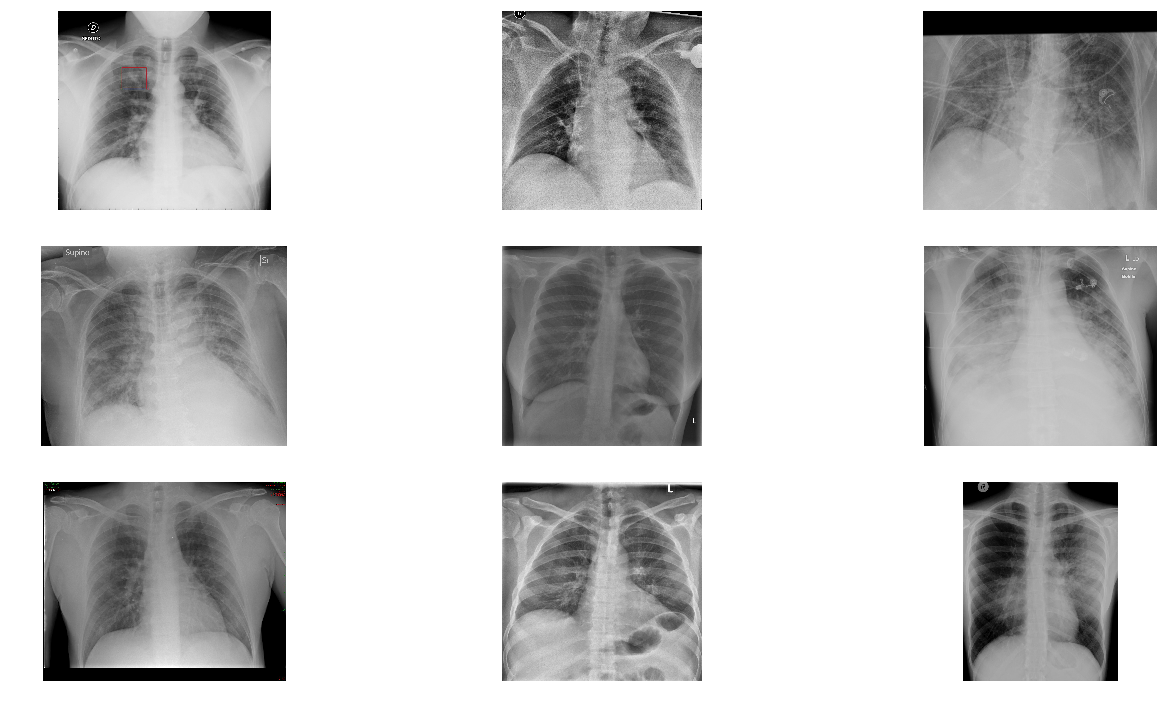

In [84]:
#visualizing the x-ray images 
images = dummy['filename'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = r'C:\Users\HP\Documents\harshit\Placements\Projects\covid-19_NEW\images'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

The dimensions of the image are 888 pixels width and 882 pixels height, one single color channel
The maximum pixel value is 255.0000 and the minimum is 14.0000
The mean value of the pixels is 151.8728 and the standard deviation is 47.2022


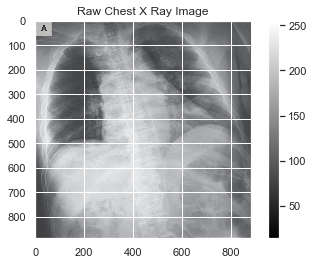

In [86]:
# Get the first image that was listed in the train_df dataframe
sample_img = dummy.filename[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

C:\Users\HP\Anaconda3\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, '# Pixels in Image')

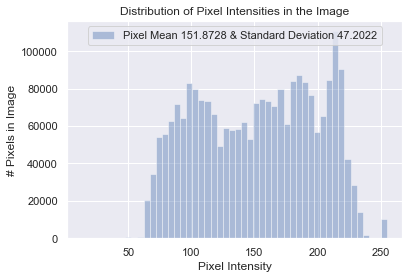

In [87]:
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [96]:
# Import data generator from keras
from keras.preprocessing.image import ImageDataGenerator
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

Using TensorFlow backend.
